In [2]:
#!pip install selenium
import time
import pandas as pd
import selenium
import re
import json
from random import randint
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.keys import Keys
from selenium import webdriver
print('Selenium Version:',selenium.__version__)
import datetime

Selenium Version: 3.141.0


In [3]:
with open('SearchResultsDict.json') as json_file:  
    data = json.load(json_file)

In [4]:
print('Number of observations:',len(data))

Number of observations: 416


In [5]:
data.keys()

dict_keys(['gla-3055085070-0', 'gla-2953228321-1', 'gla-3012677906-2', 'gla-2996000047-3', 'gla-3036050944-4', 'gla-2859138238-5', 'gla-2859138238-6', 'gla-2983161073-7', 'gla-2996918074-8', 'gla-2950845175-9', 'gla-3065094013-10', 'gla-3065094013-11', 'gla-2965174084-12', 'gla-2965174084-13', 'gla-3049543540-14', 'gla-3047043371-15', 'gla-3047043371-16', 'gla-3068172040-17', 'gla-3055519827-18', 'gla-3055519827-19', 'gla-3075939437-20', 'gla-3075939437-21', 'gla-3002887664-22', 'gla-2957279982-23', 'gla-2957279982-24', 'gla-3071980823-25', 'gla-3071980823-26', 'gla-3067762444-27', 'gla-3049508174-28', 'gla-3049508174-29', 'gla-2936602060-0', 'gla-3015320756-1', 'gla-2979003174-2', 'gla-2822860338-3', 'gla-3071868700-4', 'gla-3055651877-5', 'gla-2941000936-6', 'gla-3042323556-7', 'gla-3042323556-8', 'gla-3053840164-9', 'gla-3053840164-10', 'gla-3058849127-11', 'gla-3058849127-12', 'gla-3049511326-13', 'gla-3059350826-14', 'gla-3042323804-15', 'gla-3042323804-16', 'gla-3062447785-17', '

In [6]:
dataList=[]
lenList=[]
for value in data.values():
    dataList.append(value)
    lenList.append(len(value))

In [7]:
pd.DataFrame(lenList,columns={'estimates'}).describe()

,estimates
count,416.000000
mean,4198.877404
std,2565.524301
min,170.000000
25%,2860.000000
50%,3993.000000
75%,4980.000000
max,17667.000000


In [8]:
pd.DataFrame(dataList,columns={'estimates'}).describe()

,estimates
count,416
unique,264
top,Position Details: Data Engineer - (886060Z)\nL...
freq,4


In [9]:
postings=pd.DataFrame(dataList,columns={'Postings'})
postings['length']=lenList
postings[:5]

,Postings,length
0,Our Enterprise Risk department is looking for ...,3131
1,"About FTI Consulting\n\nFTI Consulting, Inc. i...",5877
2,Job Description\n\nJob Title: Data Analyst – C...,3613
3,The Company:\n\nWe're a tech company that's ch...,5500
4,We’re looking for a Senior Data Scientist to j...,3835


In [10]:
postings['length'].describe()

count      416.000000
mean      4198.877404
std       2565.524301
min        170.000000
25%       2860.000000
50%       3993.000000
75%       4980.000000
max      17667.000000
Name: length, dtype: float64

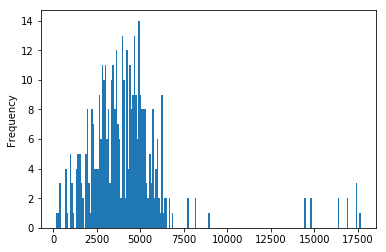

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
postings['length'].plot(bins=200, kind='hist') 

In [12]:
postings[postings['length'] == 17667]['Postings'].iloc[0]

"Data Science Internships\nPortland, OR or Seattle, WA\nThese twelve-week internships are scheduled to begin in May/June 2019\n\nCambia Health Solutions is working to create a seamless and frictionless health care experience for consumers nationwide. This presents a unique challenge and opportunity for innovative and disruptive solutions from our Artificial Intelligence team.\nOur Data Scientists design, develop, and implement data-driven solutions using machine learning technologies and advanced statistical analyses. You should be passionate about finding insights in data, comfortable with large and fragmented data sets, and command a variety of analytic tools at your disposal.\nInternship opportunities are available on the following teams: Natural Language Processing, Deep Learning, Product Development and Clinical Analytics.\nNatural Language Processing in Seattle, WA\nOur NLP team is looking for a passionate, talented and inventive NLP Data Science Intern to help build industry-lea

In [13]:
def scrubadub(variable):
    myList=(list(variable))
    clean=[]
    for i in range(0,len(myList)):
        #Regular expressions for removing web addresses
        url_reg  = r'[a-z]*[:.]+\S+'
        #and replacing with nothing
        url_text=re.sub(url_reg, '', myList[i])
        sep = " "
        junk = re.findall(r"(?i)\b[a-z]+\b", url_text)
        #join the seperated words
        junk = sep.join(junk)
        #remove _s_ spaces from text after punctuation removal
        S_space = re.sub(r' s ','',junk)
        clean.append(S_space)
    return clean

In [14]:
postTest=data['gla-2953228321-1'].lower()

In [15]:
postTest=postTest.split()

In [16]:
print('Unique words: ',len(pd.Series(postTest).unique()))

Unique words:  437


In [17]:
PostText=scrubadub(postTest)

In [18]:
print('Length of posting: ',len(PostText))

Length of posting:  773


In [37]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [38]:
postings.head()

,Postings,length
0,Our Enterprise Risk department is looking for ...,3131
1,"About FTI Consulting\n\nFTI Consulting, Inc. i...",5877
2,Job Description\n\nJob Title: Data Analyst – C...,3613
3,The Company:\n\nWe're a tech company that's ch...,5500
4,We’re looking for a Senior Data Scientist to j...,3835


In [ ]:
postings['Postings'].head(5).apply(text_process)

In [23]:
import string
from nltk.corpus import stopwords

In [24]:
stopwords.words('english')[0:10] 
#Space to specify word I want to remove
RemoveWords=[]
for i in stopwords.words('english'):
    RemoveWords.append(i)

In [25]:
# Now just remove any stopwords
clean_mess = [word for word in PostText if word.lower() not in RemoveWords]

In [26]:
clean_mess = list(filter(None, clean_mess))
WordFequency=pd.Series(clean_mess).value_counts()
WordFequency[:10]

consulting    12
data          11
fti            9
financial      8
accounting     8
skills         7
business       7
economic       6
analytical     6
client         6
dtype: int64

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(postings['Postings'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

9287


In [29]:
post1=postings['Postings'][0]
post1

"Our Enterprise Risk department is looking for a Quantitative Data Analyst to join their team. In this role, you will be responsible for developing and presenting enterprise risk models and write and execute code proficiently to create and produce monthly and quarterly risk reports. Qualified candidates will have 3 years of experience applying and developing analytical methods, including data mining techniques and statistical modeling. Having previous experience with quantitative modeling and BI tools, including SQL, Python, Tableau, SAS, and/or R will help you succeed.\n\nHere’s what you can expect from the job and what you need to be successful:\n\nJob Duties:\nPerform modeling and model validation activities as per SR 11-7 guidance to mitigate model risk\nExecute effective challenge on data and model validation activities. Analyze and challenge the data used in model development, data extraction and transformation, data quality and control, assessment of underlying theory used in mo

In [30]:
bow1 = bow_transformer.transform([post1])
print(bow1.shape)

(1, 9287)


In [31]:
bow1

<1x9287 sparse matrix of type '<class 'numpy.int64'>'
	with 226 stored elements in Compressed Sparse Row format>

In [32]:
for i in range(0,226):
    if bow1.data[i]>1:
        num=bow1.indices[i]
        print(bow_transformer.get_feature_names()[num])

Ability
Analyst
Data
Model
Python
Quantitative
R
Risk
SAS
SQL
Tableau
ability
activities
analysis
analytical
andor
business
causes
challenge
complex
data
degree
developing
environment
experience
extraction
financial
identified
including
integrity
issue
lines
management
methods
model
modeling
quantitative
risk
root
senior
skills
statistical
systems
team
techniques
tools
trends
used
validation
work
years


In [33]:
postings_bow = bow_transformer.transform(postings['Postings'])
print('Shape of Sparse Matrix: ', postings_bow.shape)
print('Amount of Non-Zero occurences: ', postings_bow.nnz)
print('sparsity: %.2f%%' % (100.0 * postings_bow.nnz / (postings_bow.shape[0] * postings_bow.shape[1])))

Shape of Sparse Matrix:  (416, 9287)
Amount of Non-Zero occurences:  116372
sparsity: 3.01%


In [34]:
from sklearn.feature_extraction.text import TfidfTransformer

In [35]:
tfidf_transformer = TfidfTransformer().fit(postings_bow)
tfidf1 = tfidf_transformer.transform(bow1)
print(tfidf1)

  (0, 9240)	0.033186664942407816
  (0, 9224)	0.02708840062055124
  (0, 9222)	0.05271768193198243
  (0, 9212)	0.029462020760297483
  (0, 9202)	0.04634912713816338
  (0, 9191)	0.01982180545391795
  (0, 9181)	0.03144484576573651
  (0, 9173)	0.02439500851376258
  (0, 9124)	0.026998180412240447
  (0, 9079)	0.051515288908362246
  (0, 9004)	0.1467459833939888
  (0, 9001)	0.06252402302876148
  (0, 8985)	0.024693715220042715
  (0, 8976)	0.08358259658210648
  (0, 8923)	0.025713946822508355
  (0, 8922)	0.08379630060790604
  (0, 8918)	0.06011424087138882
  (0, 8873)	0.07249974382143808
  (0, 8855)	0.04989482836915982
  (0, 8846)	0.05716490587257985
  (0, 8844)	0.07463482931773825
  (0, 8835)	0.034238320849186606
  (0, 8793)	0.03871959541542981
  (0, 8756)	0.04989482836915982
  (0, 8717)	0.06547335802757046
  :	:
  (0, 1630)	0.07463482931773825
  (0, 1414)	0.06927571216155662
  (0, 1342)	0.017051297342474816
  (0, 1337)	0.08379630060790604
  (0, 1334)	0.07168549431892926
  (0, 1327)	0.0435562106418

In [36]:
postings_tfidf = tfidf_transformer.transform(postings_bow)
print(postings_tfidf.shape)

(416, 9287)
